# K- Means dengan TF - IDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


K-means Clustering


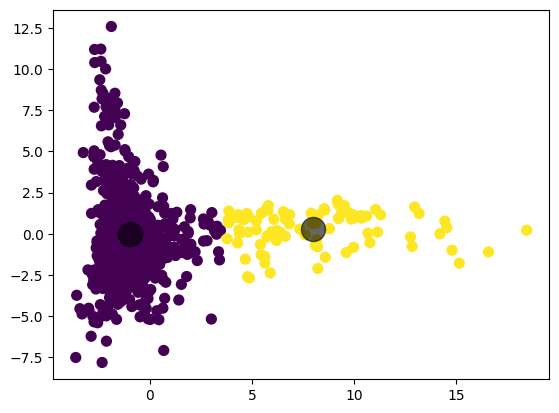

Silhouette Score: 0.6258326142236458


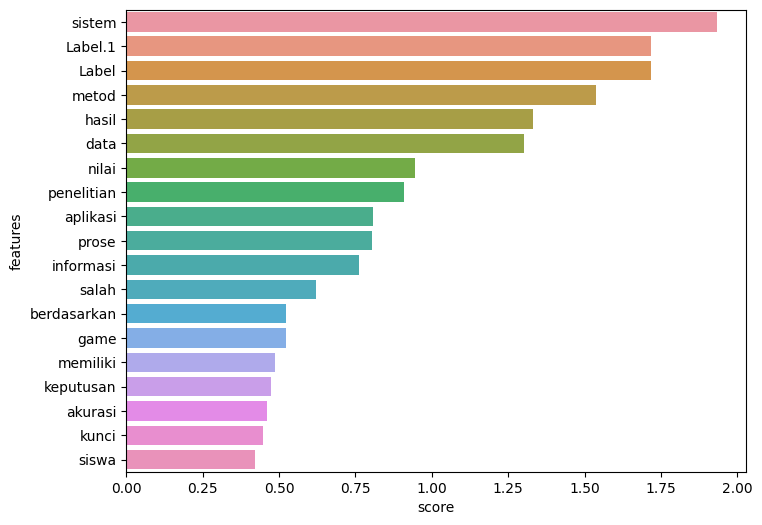

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def main():
    # Load the data
    file_path = '/content/drive/My Drive/UAS_PPW/tugas/Label_with_Features.xlsx'
    df = pd.read_excel(file_path)

    # Perform PCA
    X_std = df.values
    sklearn_pca = PCA(n_components=2)
    Y_sklearn = sklearn_pca.fit_transform(X_std)

    # Perform K-means clustering
    n_clusters = 2
    kmeans = KMeans(n_clusters=n_clusters, max_iter=400, algorithm='auto')
    fitted = kmeans.fit(Y_sklearn)
    prediction = kmeans.predict(Y_sklearn)

    # Define the elbow method function
    def elbow_method(Y_sklearn):
        number_clusters = range(1, 7)
        kmeans = [KMeans(n_clusters=i, max_iter=600) for i in number_clusters]
        score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
        score = [i * -1 for i in score]
        fig, ax = plt.subplots()
        ax.plot(number_clusters, score)
        ax.set(xlabel='Number of Clusters', ylabel='Score', title='Elbow Method')
        plt.show()

    # Define the K-means clustering function
    def kmeans_clustering(Y_sklearn, fitted):
        plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
        centers2 = fitted.cluster_centers_
        plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=300, alpha=0.6)
        plt.show()

    # Get top features for each cluster
    def get_top_features_cluster(X_std, prediction, n_feats):
        features = df.columns[:-1]  # Assuming the last column is the label
        labels = np.unique(prediction)
        dfs = []
        for label in labels:
            id_temp = np.where(prediction == label)
            x_means = np.mean(X_std[id_temp], axis=0)
            sorted_means = np.argsort(x_means)[::-1][:n_feats]
            best_features = [(features[i], x_means[i]) for i in sorted_means if i < len(features) and i < len(x_means)]
            Df = pd.DataFrame(best_features, columns=['features', 'score'])
            dfs.append(Df)
        return dfs

    # K-means Clustering
    print('K-means Clustering')
    kmeans_clustering(Y_sklearn, fitted)

    # Silhouette Score
    silhouette_avg = silhouette_score(Y_sklearn, prediction)
    print(f"Silhouette Score: {silhouette_avg}")

    # Melihat cluster fitur teratas yang diperoleh
    dfs = get_top_features_cluster(X_std, prediction, 20)
    plt.figure(figsize=(8, 6))
    sns.barplot(x='score', y='features', orient='h', data=dfs[0])
    plt.show()

if __name__ == "__main__":
    main()